In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy, pandas

# 1D

Heat equation:

$$\frac{\partial u}{\partial t} = a \frac{\partial^{2} u}{\partial x^{2}}$$

where $a = a(x, t) \ge 0$

Initial condition: 

$$u(0, x) = u_{0}(x), t=0$$

Boundary conditions: 

$$-A_{1}\frac{\partial u}{\partial x} + B_{1}u = \phi_{1}(t), x=0$$

$$A_{2}\frac{\partial u}{\partial x} - B_{2}u = \phi_{2}(t), x=X$$

Solution:

$$ \frac{u_{m}^{n+1} - u_{m}^{n}}{\tau} = a \frac{u_{m-1}^{n+1} - 2 u_{m}^{n+1} + u_{m+1}^{n+1}}{h^{2}}$$

This solution is stable with any $\tau$ and $h$ with approximation order of $O(\tau, h^{2})$.

In [2]:
def a(x, t):
    return 1.

def Solver1D(u, N_tau, N_h):
    
    tau = 1./N_tau
    h = 1./N_h
    
    # Solution

    # for n in range(1, N_tau-1):
    #     for m in range(1, N_h-1):
    #         u[m, n+1] = u[m, n] + tau * a(X[m], T[n]) * (u[m-1, n] - 2*u[m, n] + u[m+1, n]) / h**2

    # Time iterations
    for n in range(1, N_tau-1):

        A = numpy.zeros(shape=(N_h ,N_h))
        f = numpy.zeros(shape=(N_h ,))

        # Solve system of linear equations
        
        # Gaussian elimination (row reduction)
        ws = [[0, 0, 0, 0]]
        for m in range(1, N_h-1):

            if m==1:

                w0 = a(X[m], T[n]) * tau / h**2 * u[m-1, n]
                w1 = -2 * a(X[m], T[n]) * tau / h**2 - 1
                w2 = a(X[m], T[n]) * tau / h**2
                w3 = -u[m, n-1]
                w_curr = numpy.array([0, 1, w2/w1, (w3-w0)/w1])
                ws.append(w_curr)

            elif m!=1 and m!=N_h-2:

                w0 = a(X[m], T[n]) * tau / h**2
                w1 = -2 * a(X[m], T[n]) * tau / h**2 - 1
                w2 = a(X[m], T[n]) * tau / h**2
                w3 = -u[m, n-1]
                w_curr = numpy.array([w0, w1, w2, w3])

                w_p = ws[-1]
                w_prev = numpy.array([w_p[1], w_p[2], 0, w_p[3]])

                w_curr -= w_prev * w_curr[0]
                w_curr /= w_curr[1]
                ws.append(w_curr)


            elif m==N_h-2:

                w0 = a(X[m], T[n]) * tau / h**2
                w1 = -2 * a(X[m], T[n]) * tau / h**2 - 1
                w2 = a(X[m], T[n]) * tau / h**2 * u[m+1, n]
                w3 = -u[m+1, n-1]
                w_curr = numpy.array([w0, w1, 0, w3-w2])

                w_p = ws[-1]
                w_prev = numpy.array([w_p[1], w_p[2], 0, w_p[3]])

                w_curr -= w_prev * w_curr[0]
                w_curr /= w_curr[1]
                ws.append(w_curr)

        # u[m, n] estimation from the linear equations
        for m in range(1, N_h-1)[::-1]:

            if m == N_h-2:

                u[m, n] = ws[m][3]

            elif m!=1 and m!=N_h-2:

                u[m, n] = ws[m][3] - ws[m][2] * u[m+1, n]

            if m==1:

                u[m, n] = ws[m][3] - ws[m][2] * u[m+1, n]
                
                
    return u

In [3]:
# Define grid size
N_tau = 100 # Time [0, 1]
N_h = 100 # X [0, 1]

# Define arrays
X = numpy.linspace(0., 1., N_h)
T = numpy.linspace(0., 1., N_tau)
u = numpy.zeros(shape=(N_h, N_tau))

# Initial and boundary conditions
u0 = 100
uX = 0

u[0, :] = u0 * (numpy.cos(10*T) + 2.)
u[-1, :] = uX

# Solve heat equation
u = Solver1D(u, N_tau, N_h)

In [4]:
print u.shape
print X.shape
print T.shape

(100, 100)
(100,)
(100,)


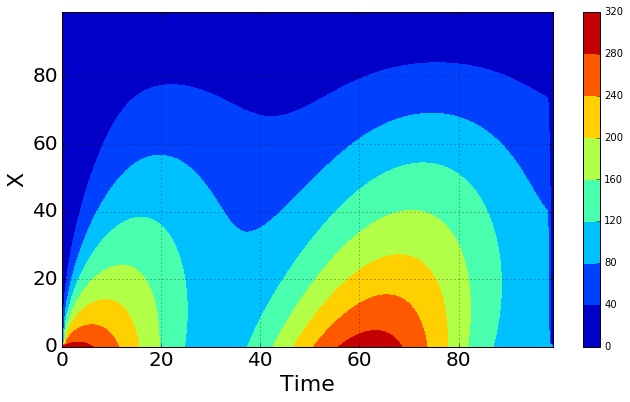

In [5]:
plt.figure(figsize=(11, 6))
plt.contourf(u)

plt.xlabel("Time", size=22)
plt.ylabel("X", size=22)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(1)
plt.colorbar()
plt.show()